# Tornado
Show 3-d polymarker.




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:44 AM.</small></i>

In [1]:
gBenchmark->Start("tornado");

double PI = 3.141592653;
int d = 16;
int numberOfPoints=200;
int numberOfCircles=40;

Create and open a canvas

In [2]:
TCanvas *sky = new TCanvas( "sky", "Tornado", 300, 10, 700, 500 );
sky->SetFillColor(14);

Creating view

In [3]:
TView *view = TView::CreateView(1,0,0);
float range = numberOfCircles*d;
view->SetRange( 0, 0, 0, 4.0*range, 2.0*range, range );

for( int j = d; j < numberOfCircles*d; j += d ) {

   // create a PolyMarker3D
   TPolyMarker3D *pm3d = new TPolyMarker3D( numberOfPoints );

   float x, y, z;

   // set points
   for( int i = 1; i < numberOfPoints; i++ ) {
      float csin = sin(2*PI / (double)numberOfPoints  * (double)i) + 1;
      float ccos = cos(2*PI / (double)numberOfPoints  * (double)i) + 1;
      float esin = sin(2*PI / (double)(numberOfCircles*d) * (double)j) + 1;
      x = j * ( csin + esin );
      y = j * ccos;
      z = j;
      pm3d->SetPoint( i, x, y, z );
   }

   // set marker size, color & style
   pm3d->SetMarkerSize( 1 );
   pm3d->SetMarkerColor( 2 + ( d == ( j & d ) ) );
   pm3d->SetMarkerStyle( 3 );

   //draw
   pm3d->Draw();
}

char timeStr[60];
gBenchmark->Show("tornado");

Float_t ct = gBenchmark->GetCpuTime("tornado");
sprintf( timeStr, "Execution time: %g sec.", ct);

TPaveText *text = new TPaveText( 0.1, 0.81, 0.9, 0.97 );
text->SetFillColor( 42 );
text->AddText("ROOT example: tornado.C");
text->AddText(timeStr);
text->Draw();
sky->Update();

tornado   : Real Time =   0.69 seconds Cpu Time =   0.50 seconds


Draw all canvases 

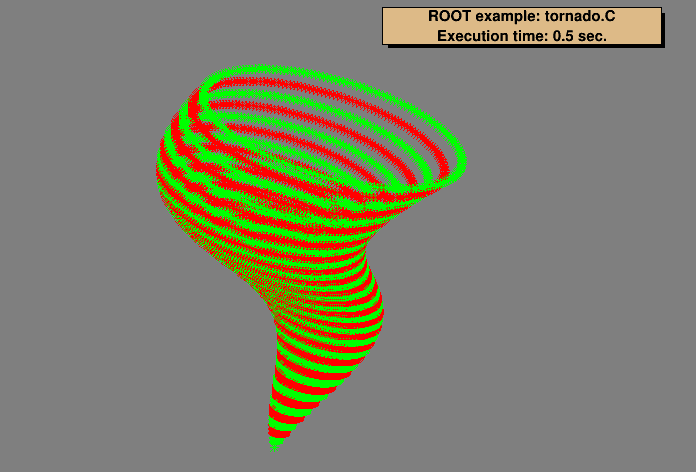

In [4]:
gROOT->GetListOfCanvases()->Draw()